In [12]:
from urllib.request import urlopen, Request 
from bs4 import BeautifulSoup 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import pandas as pd 
import matplotlib.pyplot as plt


In [13]:
news_tables = {}
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['FCEL', 'PLUG', 'PLTR']
for ticker in tickers: 
    url = finviz_url + ticker 
    req = Request(url = url, headers = {'user-agent': 'whatsapp'})
    response = urlopen(req)
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = 'news-table') # Will get us the HTML object 
    news_tables[ticker] = news_table
 
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.get_text()
        date_data = row.td.text.split(' ')
        
        if len(date_data) == 1:
            time = date[0]
        else:
            date = date_data[0]
            time = date_data[1]
        
        parsed_data.append([ticker, date, time, title])
        
               

In [14]:
# Sentiment Analysis 
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])
vader = SentimentIntensityAnalyzer()
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
print(df)

    ticker       date       time  \
0     FCEL  Mar-10-21  04:05PM     
1     FCEL  Mar-10-21          M   
2     FCEL  Mar-10-21          M   
3     FCEL  Mar-10-21          M   
4     FCEL  Mar-10-21          M   
..     ...        ...        ...   
295   PLTR  Feb-16-21          F   
296   PLTR  Feb-16-21          F   
297   PLTR  Feb-16-21          F   
298   PLTR  Feb-15-21  07:00PM     
299   PLTR  Feb-15-21          F   

                                                 title  compound  
0    Ballard Power Looks To Make Fuel-Cell History ...    0.0000  
1    Why Plug Power, FuelCell Energy, and Ballard P...    0.2732  
2        Why Hydrogen Fuel Is The Next Big Green Thing    0.0000  
3    Analyzing FuelCell Energy's Unusual Options Ac...    0.0000  
4    What's in Store for FuelCell Energy's (FCEL) Q...    0.0000  
..                                                 ...       ...  
295  Premarket Movers Tuesday - CVS, BorgWarner and...    0.0000  
296       12 Most Influential E

ticker          FCEL      PLTR      PLUG
date                                    
2020-12-30  0.273200       NaN       NaN
2020-12-31  0.116850       NaN       NaN
2021-01-04  0.000000       NaN       NaN
2021-01-06  0.136600       NaN       NaN
2021-01-07  0.117180       NaN       NaN
2021-01-08  0.273200       NaN       NaN
2021-01-10  0.000000       NaN       NaN
2021-01-12  0.136600       NaN       NaN
2021-01-13  0.407750       NaN       NaN
2021-01-14  0.208889       NaN       NaN
2021-01-15  0.178000       NaN       NaN
2021-01-19  0.200950       NaN       NaN
2021-01-20  0.000000       NaN       NaN
2021-01-21  0.307608       NaN       NaN
2021-01-22 -0.159100       NaN       NaN
2021-01-25  0.542300       NaN       NaN
2021-01-26  0.136600       NaN       NaN
2021-01-27  0.246950       NaN       NaN
2021-01-28  0.091067       NaN       NaN
2021-01-29 -0.011025       NaN       NaN
2021-01-31  0.273200       NaN       NaN
2021-02-02  0.136600       NaN       NaN
2021-02-03  0.27

<Figure size 720x576 with 0 Axes>

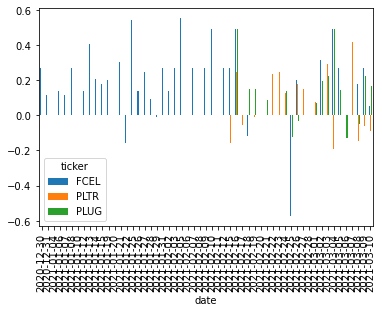

In [7]:
# Visualizing the Data
df['date'] = pd.to_datetime(df.date).dt.date
plt.figure(figsize=(10,8))

mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis = 'columns').transpose()
mean_df.plot(kind = 'bar')
print(mean_df)
plt.savefig('books_read.png')